# Lecture 3 - Probability and Fair Experiments

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') # Note that I'm using a different style sheet

import random

import numpy as np
import numpy.random as npr

# All imports in the first cell!!

The ```numpy``` library (stands for numerical Python) includes a lot of numerical functions as well as linear algebra functions.

* A typical Notebook may now start with all library/module imports in the top cells.

## Probability and Fair Experiment

**Probability** is a very useful concept that can be interpreted in a number of ways.

The concept of probability is used to assess **uncertainty** of a situation, which can broadly be defined in two ways:
* **Frequency of Occurrence**: percentage of successes in a moderately large number of similar situations. **Frequentlist view**
* **Subjective Belief**: use of personnal/group/cultural beliefs for given experiences of successful decision making. **Bayesian view**

In order to describe uncertainty in terms of probabilistic models and probabilistic reasoning, we make use of the generic structure of such models and their basic properties, in particular **set theory**.

* Make sure you watch the video on "Lecture 3b - sets and set operations" as preparation for this class.

<div class="alert alert-info">
    <b>Probability</b>
    
The **probability** of an event is a number between 0 and 1 that quantifies how likely that event is to occur. An event that cannot occur has probability 0, and an event that is sure to occur has probability 1. The probabilities of the outcomes sum to 1.
</div>

<div class="alert alert-info">
    <b>Fair</b>
    
We say an experiment is **fair** if every outcome is equally likely (they have the same probability).
</div>

Proof: Consider a fair experiment with $N$ outcomes, and let $p_i$ denote the probability of outcome $i$, then

\begin{align} \sum_{i=1}^{N} p_i &= 1 \\
\sum_{i=1}^{N} p_1 &= 1 \\
Np_1 &= 1\\
p_1 &= \frac 1 N\\
p_i &= \frac 1 N
\end{align}

* For example, the probability of getting any number on a fair 6-sided die is 1/6. Let's compare these to the *relative frequencies*.

But first let's see how to count the number of occurrences of each outcome:

In [5]:
num_sims = 100
values =[]

for sim in range(num_sims):
    die = random.choice(range(1,7)) #range of possible numbers from 1-7 exclusively so 1-6 really
    values +=[die]
    
print(values)

[5, 3, 2, 2, 1, 2, 1, 2, 5, 2, 1, 5, 2, 5, 6, 2, 2, 1, 1, 2, 1, 1, 6, 4, 1, 5, 2, 6, 6, 2, 3, 1, 6, 6, 1, 2, 2, 4, 3, 2, 5, 5, 4, 6, 6, 3, 6, 4, 1, 4, 5, 5, 4, 1, 2, 5, 4, 5, 4, 5, 4, 3, 4, 3, 1, 2, 6, 5, 5, 1, 1, 4, 6, 6, 4, 6, 5, 1, 3, 2, 4, 6, 5, 1, 4, 5, 6, 3, 6, 5, 6, 1, 3, 3, 3, 1, 2, 1, 2, 4]


Let's first keep a counter for each face value and increment that counter whenever we see that face value. Start with a list of 7 zeros (to give 7 counters from 0 to 6; we won't use counter 0):

In [6]:
#more efficient alternative
num_sims = 100
values =  random.choices(range(1,7), k=num_sims)
print(values)

[1, 4, 2, 5, 4, 6, 5, 6, 2, 2, 5, 4, 6, 3, 1, 4, 2, 5, 3, 2, 1, 4, 4, 2, 1, 4, 6, 2, 4, 5, 2, 1, 5, 6, 4, 6, 4, 5, 6, 6, 4, 2, 6, 6, 4, 2, 1, 5, 1, 1, 2, 5, 1, 2, 4, 3, 5, 6, 4, 6, 1, 2, 4, 2, 6, 3, 6, 1, 4, 1, 5, 2, 4, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 2, 2, 3, 1, 1, 4, 5, 6, 4, 4, 5, 3, 4, 1, 5, 2, 3]


In [12]:
counters=[0]*6
counters

[0, 0, 0, 0, 0, 0]

In [13]:
num_sims = 100
values =[]

for sim in range(num_sims):
    die = random.choice(range(1,7)) #range of possible numbers from 1-7 exclusively so 1-6 really
    values +=[die]
    counters[die-1]+=1 #because the matrix starts at position 0
    
counters

[18, 11, 19, 12, 18, 22]

We can use these counters to make our first plots. Let's start with a simple bar graph:

In [17]:
vals=list(range(1,7))
vals

[1, 2, 3, 4, 5, 6]

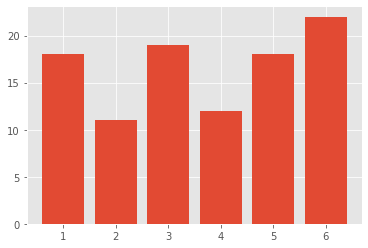

In [22]:
plt.bar(vals,counters);

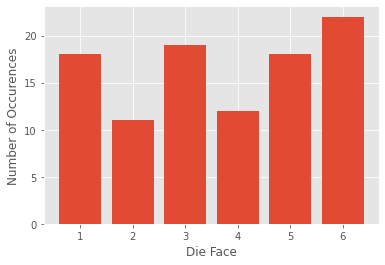

In [21]:
plt.bar(vals, counters)
plt.xlabel("Die Face")
plt.ylabel("Number of Occurences");

Putting it all together, we have:

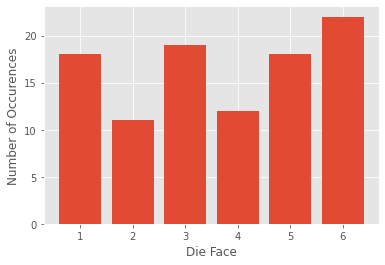

In [23]:
num_sims = 100
values =list(range(1,7))

for sim in range(num_sims):
    die = random.choice(range(1,7)) #range of possible numbers from 1-7 exclusively so 1-6 really
   # values +=[die]
    
plt.bar(vals, counters)
plt.xlabel("Die Face")
plt.ylabel("Number of Occurences");

Here is a more elegant approach (using ```numpy```) if we just want the counts of the outcomes:

In [25]:
num_sims=1000
outcomes=[]
for sim in range(num_sims):
    die=random.choice(range(1,7))
    outcomes+=[die]
    
# The magic counting code goes here...
np.unique(outcomes, return_counts = True)


(array([1, 2, 3, 4, 5, 6]), array([151, 167, 157, 162, 167, 196], dtype=int64))

Then to get the **relative frequencies** is easy:

In [35]:
num_sims=1000000
outcomes=[]
for sim in range(num_sims):
    die=random.choice(range(1,7))
    outcomes+=[die]
    
# To be finished in class
vals, counts =np.unique(outcomes, return_counts = True)
for i in range(len(vals)):
    print(vals[i], counts[i]/num_sims)

1 0.166191
2 0.16689
3 0.166344
4 0.166829
5 0.166892
6 0.166854


Text(0, 0.5, 'Relative Frequency')

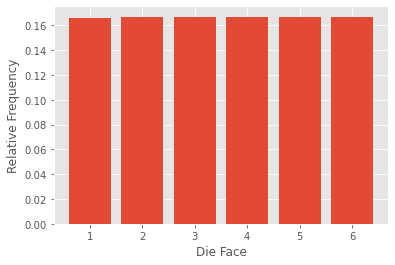

In [36]:
plt.bar(vals, counts/num_sims)
plt.xlabel("Die Face")
plt.ylabel("Relative Frequency")

* How does the relative frequency of each outcome change as we increase/decrease the number of simulations?
the frequencies get closer to each other
* What is your conclusion in terms of amount of data needed?
the more data u have the more accurate your probability is

* Does the relative frequency *converge* to some value as the number of simulations increases?
yes

Let's try that for another example; our experiment where we flip a coin 20 times:

In [44]:
faces = ['H','T']
num_sims=1000000
flips=20
counts=[]

for sim in range(num_sims):
    coins=random.choices(faces,k=flips)
    num_heads=coins.count('H')
    counts+=[num_heads]
    
# To be finished in class
vals, counts = np.unique(counts, return_counts = True)
for i in range(len(vals)):
    print(vals[i],counts[i]/num_sims)

1 1.8e-05
2 0.000189
3 0.001089
4 0.004641
5 0.014733
6 0.036863
7 0.074242
8 0.11989
9 0.16066
10 0.175951
11 0.15975
12 0.11992
13 0.074239
14 0.036892
15 0.014792
16 0.004854
17 0.001083
18 0.000186
19 8e-06


We can **speed up** this simulation by using the 2D array notation introduced in the preparation video:

In [47]:
results = npr.randint(2,size=(num_sims,flips))
num_heads=np.sum(results, axis=1)

# To be finished in class
vals, counts = np.unique(num_heads, return_counts=True)
for i in range(len(vals)):
    print(vals[i], counts[i]/num_sims)

0 1e-06
1 1.8e-05
2 0.00016
3 0.001058
4 0.004639
5 0.014873
6 0.037055
7 0.073851
8 0.119837
9 0.15971
10 0.176727
11 0.160447
12 0.120461
13 0.073584
14 0.036921
15 0.014749
16 0.004601
17 0.001111
18 0.00018
19 1.7e-05


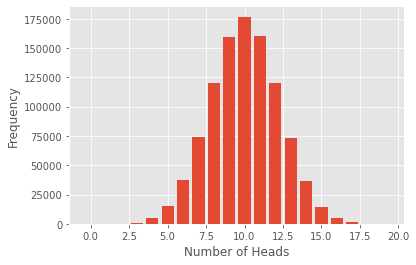

In [50]:
plt.bar(vals, counts)
plt.xlabel("Number of Heads")
plt.ylabel("Frequency");

* So why are the outcomes of this experiment not equally likely?
Because we are combining multiple fair experiments, which may not be a fair experiment itself

This experiment is a special case of a sequential probabilist model, also called **combined experiment**. Before we characterize it, we need to:
1. relate relative frequency with probability, and
2. define probabilistic models

## Probability as a Measure of Frequency of Occurrence

In the experiments we have conducted, the relative frequencies converge to some constant values when the number of trials gets large.

* The experiments we have conducted are fair or are combined experiments with fair sub-experiments, for which we (now) know how to calculate the probabilities:

<h3 align="center">the relative frequencies converge to the probabilities</h3>
    
* If the relative frequencies converge for an experiment, we say the experiment possesses *statistical regularity* and consider those here.

Consider a random experiment that has $K$ possible outcomes, where $K<\infty$.

Let $N_k(n) = \text{the number of times the outcome is }k$ and let the relative frequency of outcome $k$ be

$$r_k(n) = \frac{N_k(n)}{n}$$

If the relative frequencies converge, i.e., $\lim_{n\rightarrow\infty}r_k(n)$ is a constant for each $k$, then:

<div class="alert alert-info">
    <b>Probability as a Measure of Frequency of Occurrence</b>
    
For experiments with statistical regularity,
    $$\lim_{n\rightarrow\infty} r_k(n) = p_k$$
is called the **probability of outcome $k$**.
</div>

### Properties of Relative Frequency

Note that 

$$0 \leq N_k(n) \leq n, \forall k$$

because $N_k(n)$ is just the \# of times outcome $k$ occurs in $n$ trials.

Dividing by $n$ yields:

$$0 \leq \frac{N_k(n)}{n} = r_k(n) \leq 1, \forall k=1,\dots,K$$

If $1,2,\dots,K$ are all of the possible outcomes, then

$$\sum_{k=1}^K N_k(n) = n$$

Again, dividing by $n$ yields:

$$\sum_{k=1}^K r_k(n) = 1$$

For example: Consider rolling a 6-sided die and let the **event** $E=\text{even number occurs}$.

* *What can we say about the number of times $E$ is observed in $n$ trials?*

$$N_E(n) = N_2(n) + N_4(n) + N_6(n)$$

* *What have we assumed in developing this equations?*

That the outcomes 2, 4 and 5 are mutually exclusive.

Then, dividing the $N_E(n)$ by $n$,

\begin{align} r_E(n) = \frac{N_E(n)}{n} &= \frac{N_2(n) + N_4(n) + N_6(n)}{n} \\
&= r_2(n) + r_4(n) + r_6(n)
\end{align}

* **General property:** If $A$ and $B$ are 2 mutually exclusive (m.e.) events, and $C$ is the event that either $A$ or $B$ occurs, then

$$r_C(n) = r_A(n) + r_B(n)$$

* *What are some problems with defining probabilities as the limits of relative frequencies?*

    1. It is not clear when and in what sense the limit exists.
    2. It is not possible to perform an experiment an infinite number of times, so the probabilities can never be known exactly.
    3. We cannot use this definition if the experiment cannot be repeated.

We need a <font color=blue>mathematical model of probability</font> that is not based on a particular application or interpretation. However, any such model should:
1. be useful for solving real problems
2. agree with out interpretation of probability as relative frequency
3. agree with out intuition (<font color=blue>where appropriate!</font>)

## Probabilistic Models

We define a *probabilistic model* as a mathematical construction containing three elements. We say that a probability model is a *triple*: $(\Omega,\mathcal{F}, P)$.

We have already defined the **sample space** $\Omega$ and the event class $\mathcal{F}$. We need to specificy $P$:

<div class="alert alert-info">
The <strong>probability measure</strong>, denoted by $P$ is a numerically-valued set function that maps all members of $\mathcal{F}$ onto $\mathbb{R}$.
</div>

Gathering this info together, we have:

<div class="alert alert-info">
    <b>Elements of a Probabilistic Model: $(\Omega, \mathcal{F}, P)$</b>
    
* The **sample space** $\Omega$, which is the set of all possible **outcomes** of an experiment. Different elements of the sample space should be distinct and *mutually exclusive*

* The **event** $\mathcal{F}$ a subset of the sample space, that is, a collection of possible **outcomes**

* The **probability measure** $P$ is a numerically-valued set function that maps all members of $\mathcal{F}$ onto $\mathbb{R}$, that is, $P: \mathcal{F} \longrightarrow \mathbb{R}$.
</div>

Consider an experiment with equally likely outcomes $S$, where $|S|=N$.

If $E \subset S$ is an event that consists of $K$ equally likely outcomes
(i.e,. $E=\{ o_1, o_2, \ldots, o_K\}$ 
    \begin{eqnarray*}
      P(E) &=& \sum_{j=1}^{K} P(o_j) \\
       &=& \sum_{j=1}^{|E|} \frac{1}{|S|}  \\
       &=& \frac{|E|}{N} = \frac{K}{N}
    \end{eqnarray*}

* <font color=blue>Example:</font> What is the probability of getting a 1 or 2 when rolling a fair 6-sided die?

<!--$\Omega=\{1,2,\ldots, 6\}$
$E=\{1,2\}$ 

$P(E)=\frac{|E|}{|S|}=2/6=1/3$ -->

## Axioms of Probability

**Axioms:** we specify a minimal set of rules that $P$ must obey.

1. $\forall E\in\mathcal{F}, P(E)\geq 0$

2. $P(\Omega)=1$

3. $\forall E, F \in \mathcal{F}, P(E\cup F) = P(E) + P(F)$ if $E$ and $F$ are mutually exclusive, that is, $E\cap F =\emptyset$

4. If $A_1,A_2,\dots$ is a sequence of event such that $A_i\cap A_j = \emptyset \forall i\neq j$, then

$$P\left(\bigcup_{k=1}^{\infty} A_k\right) = \sum_{k=1}^{\infty} P(A_k)$$

We can use Axioms 1-3 to deal with finite sample spaces. However, Axiom 4 is required instead of Axiom 3 for infinite sample spaces.

* Axiom 3 is a special case of Axiom 4.
* The unions and summations in Axiom 4 are over countable index sets only.

### Corollaries

Let $A\in\mathcal{F}$ and $B\in\mathcal{F}$ be two events. Then the following properties of $P$ can be derived from the axioms and the mathematical structure of $\mathcal{F}$:

* **Let's use the virtual whiteboard to prove these corollaries**

1. $P(A^c) = 1 - P(A)$

2. $P(A) \leq 1$

3. $P(\emptyset) = 0 $

4. If $A_1,A_2,\dots,A_n$ are pairwise mutually exclusive, then $P\left(\bigcup_{k=1}^n A_k\right) = \sum_{k=1}^n P(A_k)$. Proof is by induction.

5. $P(A\cup B) = P(A) + P(B) - P(A\cap B)$
    * **Exercise:** A fair six-sided die is rolled twice. What is the probability of observing either a 1 or a 2 on the top face on either roll? 

6. $P\left(\bigcup_{k=1}^n A_k\right) = \sum_{k=1}^n P(A_j) - \sum_{j<k} P(A_j\cap A_k) + \dots + (-1)^{(n+1)}P(A_1\cap A_2 \cap \dots\cap A_n)$

* *Add all single events, subtract off all intersections of pairs of events, add in all intersections of 3 events, ...* Proof is by induction.

7. If $A\subset B$, then $P(A)\leq P(B)$